In [1]:
#!pip install -U statsmodels

<div style='background-image: url("../share/Aerial_view_LLNL.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: center ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.8) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">Notebook 5:</div>
            <div style="font-size: x-large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Statistics for Digital Humanists</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Estimated Time: 60 minutes</div>
        </div>
    </div>
</div>

# Introduction to Statistics
In this jupyter notebook, we will learn some basic statistics:

1. [mean, median, mode](#1)
2. [standard deveiation](#2)
3. [t-test](#3)
4. [correlation](#4)
5. and some [light regression](#5)

## 0. Preparing Our Dataset  <a id='0'></a>
We will use some metadata on manuscripts.

For the most part, you don't have to worry about all the codes we used in this section to fix the data and make it more usable for out purpose of learning basic statistic. Instead, you can skip to the end of this section 0 and try to familiarize yourself with the [cleaned dataset](#clean).

In [1]:
# This simply sets up the notebook. Don't worry about this for now.

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/BSB-HS.csv')

In [3]:
df.head()

,Author,BSB Catalog,By,Creation,Digital Object Identifier,Extent,Height,Identifier,Label,Language,Location,Object Type,Preferred title of work,Thumbnail,Title,Width
0,"<span>Christianus, Stabulensis -- (GND: <a hre...",<a href='https://opacplus.bsb-muenchen.de/titl...,Christianus Stabulensis,"[S.l.], 14./15. Jh.",<a href='https://nbn-resolving.org/urn:nbn:de:...,I + 174 Bl. - Pergament,33.952409,BSB-Hss Clm 4527,"Christianus, Stabulensis: Expositio in evangel...",Latin,"München, Bayerische Staatsbibliothek -- Clm 45...",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Expositio in evangelium Matthaei - BSB Clm 4527,23.232533
1,"<span>Gratianus, de Clusio -- (GND: <a href='h...",<a href='https://opacplus.bsb-muenchen.de/titl...,NaN,"[S.l.], 14./15. Jh.",<a href='https://nbn-resolving.org/urn:nbn:de:...,342 Bl. - Pergament,50.471658,BSB-Hss Clm 23552,"Gratianus, de Clusio: Gratiani decretum cum gl...",Latin,"München, Bayerische Staatsbibliothek -- Clm 23552",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Gratiani decretum cum glosa - BSB Clm 23552,31.178500
2,"<span>Konrad, von Brundelsheim, Heilsbronn, Ab...",<a href='https://opacplus.bsb-muenchen.de/titl...,NaN,"[S.l.], 1400",<a href='https://nbn-resolving.org/urn:nbn:de:...,283 Bl. - Papier,31.110980,BSB-Hss Clm 8847,"Konrad, von Brundelsheim, Heilsbronn, Abt: Con...",Latin,"München, Bayerische Staatsbibliothek -- Clm 8847",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Conradi Socci sermonum de tempore pars aestiva...,21.488400
3,NaN,<a href='https://opacplus.bsb-muenchen.de/titl...,NaN,"[S.l.], 15. Jh.",<a href='https://nbn-resolving.org/urn:nbn:de:...,291 Bl. - Papier,32.988034,BSB-Hss Clm 15141,Haymo episcopus Halberstatensis super Apocalyp...,Latin,"München, Bayerische Staatsbibliothek -- Clm 15141",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Haymo episcopus Halberstatensis super Apocalyp...,21.399500
4,"<span>Johannes, de Lignano -- (GND: <a href='h...",<a href='https://opacplus.bsb-muenchen.de/titl...,Johannes de Lignano,"[S.l.] Böhmen (?), um 1400",<a href='https://nbn-resolving.org/urn:nbn:de:...,I + 328 Bl. - Papier,32.674505,BSB-Hss Clm 14257,"Johannes, de Lignano: Commentarius in Decretal...",Latin,"München, Bayerische Staatsbibliothek -- Clm 14257",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Commentarius in Decretales Gregorii IX. papae ...,22.783800


In [4]:
def get_year(x):
    
    if pd.isnull(x):
        return None
    
    pattern0 = r'([0-9]+)\./([0-9]+)\.\sJh\.'
    if re.search(pattern0, x) != None:
        tot = int(re.search(pattern0, x).groups()[0] + '00') + int(re.search(pattern0, x).groups()[1] + '00')
        return tot/2

    pattern3 = r'1\.\sHälfte\s([0-9]+)\.\sJh\.'
    if re.search(pattern3, x) != None:
        return int(re.search(pattern3, x).groups()[0] + '00') - 75
    
    pattern4 = r'2\.\sHälfte\s([0-9]+)\.\sJh\.'
    if re.search(pattern4, x) != None:
        return int(re.search(pattern4, x).groups()[0] + '00') - 25
    
    pattern5 = r'Mitte\s([0-9]+)\.\sJh\.'
    if re.search(pattern5, x) != None:
        return int(re.search(pattern5, x).groups()[0] + '00') - 50

    pattern6 = r'Ende\s([0-9]+)\.\sJh\.'
    if re.search(pattern6, x) != None:
        return int(re.search(pattern6, x).groups()[0] + '00') - 10
    
    pattern7 = r'1\.\sViertel\s([0-9]+)\.\sJh\.'
    if re.search(pattern7, x) != None:
        return int(re.search(pattern7, x).groups()[0] + '00') - 80
    
    pattern8 = r'2\.\sViertel\s([0-9]+)\.\sJh\.'
    if re.search(pattern8, x) != None:
        return int(re.search(pattern8, x).groups()[0] + '00') - 60
    
    pattern9 = r'3\.\sViertel\s([0-9]+)\.\sJh\.'
    if re.search(pattern9, x) != None:
        return int(re.search(pattern9, x).groups()[0] + '00') - 40
    
    pattern10 = r'4\.\sViertel\s([0-9]+)\.\sJh\.'
    if re.search(pattern10, x) != None:
        return int(re.search(pattern10, x).groups()[0] + '00') - 20
    
    pattern1 = r'([0-9]+)\.\sJh\.'
    if re.search(pattern1, x) != None:
        return int(re.search(pattern1, x).groups()[0] + '00') - 100
    
    pattern2 = r'([0-9]{4})'
    if re.search(pattern2, x) != None:
        return int(re.search(pattern2, x).groups()[0])
    
    else:
        return None
    
def get_extent(x):
    
    if pd.isnull(x):
        return None
    
    pattern = r'([0-9]+)\sBl\.'
    if re.search(pattern, x) != None:
        return int(re.search(pattern, x).groups()[0])
    
    else:
        return None
    
    
def fix_lang(x):
    if type(x) == str and len(x) > 0:
        return x
    else:
        return None

In [5]:
df['Year'] = df['Creation'].apply(get_year)
df['Pages'] = df['Extent'].apply(get_extent)
df['Area'] = df['Height'] * df['Width']
df['Language'] = df['Language'].apply(fix_lang)

### Cleaned Dataset: <a id='clean'></a>

From the cleaned version of the dataset, we will isolate the columns we will use and create a new table called `manuscripts.` We will be working with this to learn basic statistics. Take a look at the first 5 rows of our dataset below:

In [6]:
manuscripts = df[['Year', 'Pages', 'Height', 'Width', 'Area','Language']]
manuscripts.head()

,Year,Pages,Height,Width,Area,Language
0,1450.0,174.0,33.952409,23.232533,788.800465,Latin
1,1450.0,342.0,50.471658,31.178500,1573.630579,Latin
2,1400.0,283.0,31.110980,21.488400,668.525183,Latin
3,1400.0,291.0,32.988034,21.399500,705.927433,Latin
4,1400.0,328.0,32.674505,22.783800,744.449393,Latin


## 1. Mean, Median, Mode  <a id='1'></a>

Let's review the definitions of the three main measures of central tendency: **Mean, Median, Mode**

### Mean

The mean of a set of values is the quantity given by the following formula:

$$
\frac{\text{Sum of values}}{\text{# of values}}
$$


Let's say we want to figure out the average number of pages from all the manuscripts in our dataset. To find this, we first isolate the `Pages` coumn and apply the `mean()` function:

In [7]:
manuscripts['Pages'].mean()

150.22863741339492

### Median

The "middle" value of a dataset. That is, if you make an ordered list of the values from smallest to largest, the median is the middle value. If the number of values is even, then the median is the average of the 2 middle values. Similar to `mean`, there is a `median()` function that you can call on a set of values.

In [8]:
manuscripts['Pages'].median()

140.0

### Mode

The mode of a set of values is a value that occurs the most frequently. There can be multiple modes in a dataset.

In [9]:
manuscripts['Pages'].mode()

0    1.0
dtype: float64

For a quick exercise, find the mean, median, and mode of the `Year` column of the manuscripts dataset.

In [10]:
# Replace the ellipses with your own code
year_mean = ...
year_median = ...
year_mode = ...

print("The mean of the Year column is: ", year_mean)
print("The median of the Year column is: ", year_median)
print("The mode of the Year column is: ", year_mode)

The mean of the Year column is:  Ellipsis
The median of the Year column is:  Ellipsis
The mode of the Year column is:  Ellipsis


Great! But that's too easy. And it really doesn't give much insight. What if we want to find out the average page of manuscripts in each of the different languages?

First we isolate the two columns we need: `Language` and `Pages`. Then we apply the `dropna()` function that removes the rows with missing values. Then, we use the `groupby()` function and put `Language` as a parameter, indicating we are "grouping" by the `Language` column. Finally, we select the `Pages` column and again use the `mean()` function to calculate the average *by Language*.

In [11]:
manuscripts[['Language', 'Pages']].dropna().groupby(['Language'])['Pages'].mean()

Language
Arabic                                139.255319
Armenian                              287.000000
Bulgarian                             221.000000
Catalan                               126.000000
Dutch                                 206.000000
French, Old (842-ca.1400)             142.250000
German                                 75.090909
German, Middle High (ca.1050-1500)     85.729508
German, Old High (ca.750-1050)         42.666667
Germanic                               76.000000
Greek                                 161.500000
Greek, Ancient (to 1453)              229.540541
Hebrew                                165.208955
Italian                                79.000000
Lateinisch                            164.000000
Latin                                 153.400426
Persian                               105.000000
Persian, Old (ca.600-400 B.C.)        104.000000
Slavic                                  2.000000
Turkish                                92.000000
Name: Pages

Awesome! Now, can you try figuring out how to get the average `Area` by `Language`?

In [12]:
#SOLUTION
#manuscripts[['Language', 'Area']].dropna().groupby(['Language'])['Area'].mean()

Cool! Now that we know how to do some basic calculations, we can do more interesting things: data visualization! One of the most useful visualization for statistics is called a **boxplot**. Boxplots are a standardized way of displaying the distribution of data:
![a](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)


We can create a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) of the number of pages of each manuscript by langauge:

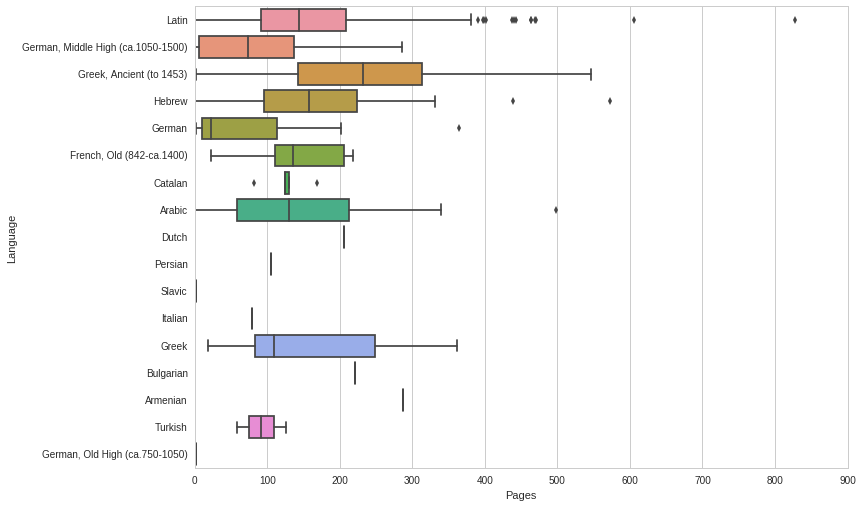

In [13]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(ax = ax, data=manuscripts.dropna(),x='Pages', y='Language')

Take a moment to study the boxplot and lcoate the minimum, median, and maximum number of pages by language. You can also start to compare the average number of pages of manuscripts found in different languages by looking at where the medians are. What language has, on average, the most number of pages per manuscripts?

Let's look at another one. Here's a boxplot of the height of each manuscript by langauge:

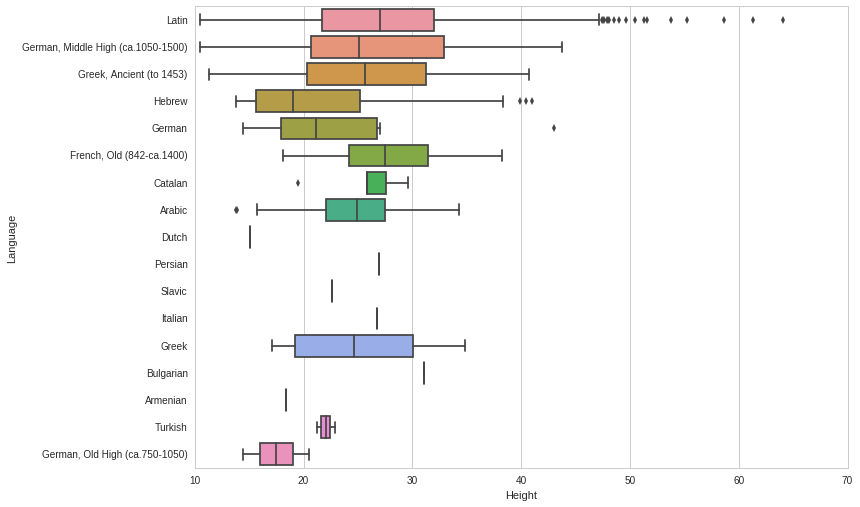

In [14]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(ax = ax, data=manuscripts.dropna(),x='Height', y='Language')

Now it's your turn! Try creating a boxplot of the `Width` of the manuscripts by `Language`.

In [15]:
#SOLUTION
#fig, ax = plt.subplots(figsize=(11.7, 8.27))
#ax = sns.boxplot(ax = ax, data=manuscripts.dropna(),x='Width', y='Language')

How about a box plot of the `Height` of the manuscripts by `Language`?

In [16]:
#SOLUTION
#fig, ax = plt.subplots(figsize=(11.7, 8.27))
#ax = sns.boxplot(ax = ax, data=manuscripts.dropna(),x='Area', y='Language')

Awesome! Boxplots are powerful visualizations that can give a quick overview of that data's basic make up, making it also useful for comparison.

## 2. Standard Deviation (SD)  <a id='2'></a>

Standard deviation (SD) "measures roughly how far the numbers on the list are from their average" by calculating the root mean square of deviations from average:

$$
=\sqrt{\frac{\text{Sum[(value$_{1}$ - average)$^2$ + (value$_{2}$ - average)$^2$ ... (value$_{n}$ - average)$^2$]}}{n}}
$$

where $n$ is the number of values in the dataset.

To calculate the SD of a number we simply use the `np.std()`. For example, to find out the SD of the number of pages of all the greek manuscripts, we will use the following code:

In [37]:
greek_manuscipts = manuscripts.loc[df['Language'] == 'Greek'].dropna()
np.std(greek_manuscipts["Pages"])

121.77951387651373

What we can infer from this is that the average Greek manuscript's page length is roughly 121 pages more or less than the mean of all page lengths of all Greek manuscripts, which is 161 pages. 

Below, we can see all the SDs for each of the columns.

In [38]:
np.std(greek_manuscipts)

Year      149.071198
Pages     121.779514
Height      6.688145
Width       5.452808
Area      265.635872
dtype: float64

## 3. T-Test  <a id='3'></a>

[T-tests](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) are a method of testing hypotheses in statistics. They are used to help determine if there is a significant likelihood that the means of two independent populations differ.

To illustrate this concept, let's first come up with a research question. Suppose we wanted to know if there exists a significant difference in average page length between Latin and German manuscripts.

**Our null hypothesis**: There is no substantial difference in average page length between Latin and German manuscripts in general. That is, the difference between average page lengths is 0. 

Using our samples of Latin and German manuscripts, we can proceed to use a T-test to test this hypothesis.


Let's first select the page lengths for all German manuscripts in our data:

In [40]:
group1 = manuscripts[manuscripts['Language']=='German'][['Language', 'Pages']].dropna()
group1.head()

,Language,Pages
47,German,364.0
54,German,30.0
79,German,84.0
198,German,1.0
235,German,18.0


and all Latin manuscripts:

In [42]:
group2 = manuscripts[manuscripts['Language']=='Latin'][['Language', 'Pages']].dropna()
group2.head()

,Language,Pages
0,Latin,174.0
1,Latin,342.0
2,Latin,283.0
3,Latin,291.0
4,Latin,328.0


Now that we have two different, independent samples, we can use the function `ttest_ind`, which takes in 2 arrays, one for each group, to perform the T-test:

In [46]:
ttest_ind(group1['Pages'], group2['Pages'])

Ttest_indResult(statistic=-2.820794878955899, pvalue=0.0048904735102955708)

Notice that the **p-value** is less than .005.

The p-value is essentially the probability that the result we observed happened by chance. Thus, the lower the p-value, the higher the likelihood that the mean between Latin and German manuscripts in general differs from 0. 

In addition, we say we "reject the null hypothesis" when the p-value is below a certain threshold. 

> If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

So, in this case, we can reject the null hypothesis at the 1% (p-value less than 0.01) threshold, and we can be confident that there is indeed a difference in average page length between Latin and German manuscripts in general.

## 4. Correlation <a id='4'></a>

Correlation measures the strength of a linear association between two variables. What happens to one variable as the other increases? 
* When one variable increases when the other increases, the two variables are **positively correlated**. 
* Conversely, when one variable decreases when the other increases, the two variables are **negatively correlated**.



Let's look at some examples.

### Perfect Positive Correlation

(0, 50)

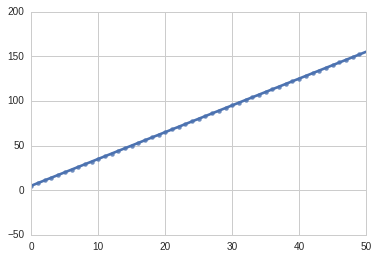

In [50]:
# Generating dummy data
dummy_x = np.arange(0, 50)
dummy_y = 3*dummy_x + 5
sns.regplot(x=dummy_x, y=dummy_y)
plt.xlim(0, 50)

### Perfect Negative Correlation

(0, 50)

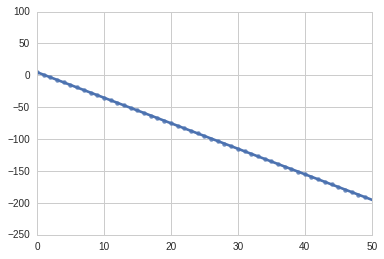

In [55]:
dummy_x = np.arange(0, 50)
dummy_y = -4*dummy_x + 5
sns.regplot(x=dummy_x, y=dummy_y)
plt.xlim(0, 50)

As you can see above, perfect correlation implies that the relationship between the two variables can be defined by a line. However, perfect correlation rarely occurs in the real world. Its more likely that you will see data such as the following:

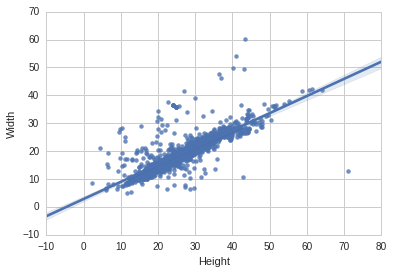

In [53]:
ax = sns.regplot(x="Height", y="Width", data=manuscripts, scatter_kws={'s':20})

Although it isn't perfect correlation, the variables Height and Width do seem to be positively correlated. 

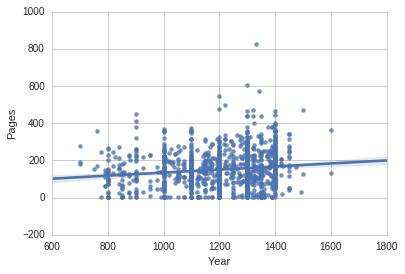

In [56]:
ax = sns.regplot(x="Year", y="Pages", data=manuscripts, scatter_kws={'s':20})

On the other hand, the Year and Pages variables show little to no correlation.

In [116]:
mod = smf.ols(formula='Width ~ Height', data=manuscripts)
res = mod.fit()
#print(res.summary())

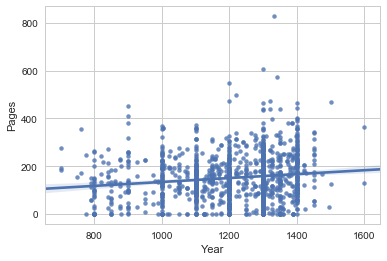

In [114]:
#ax = manuscripts.plot.scatter('Year', 'Pages')
ax = sns.regplot(x="Year", y="Pages", data=manuscripts, scatter_kws={'s':20})

In [117]:
mod = smf.ols(formula='Pages ~ Year', data=manuscripts)
res = mod.fit()
#print(res.summary())

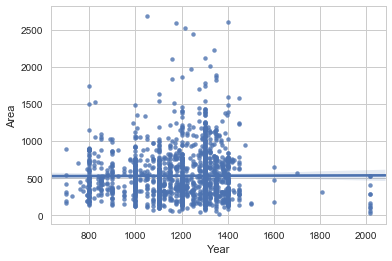

In [115]:
#ax = manuscripts.plot.scatter('Year', 'Area')
ax = sns.regplot(x="Year", y="Area", data=manuscripts, scatter_kws={'s':20})

In [119]:
mod = smf.ols(formula='Area ~ Year', data=manuscripts)
res = mod.fit()
#print(res.summary())

In [25]:
manuscripts.corr()

,Year,Pages,Height,Width,Area
Year,1.000000,0.135827,0.002319,-0.049251,0.003805
Pages,0.135827,1.000000,0.162585,0.111609,0.137876
Height,0.002319,0.162585,1.000000,0.817228,0.930910
Width,-0.049251,0.111609,0.817228,1.000000,0.933150
Area,0.003805,0.137876,0.930910,0.933150,1.000000


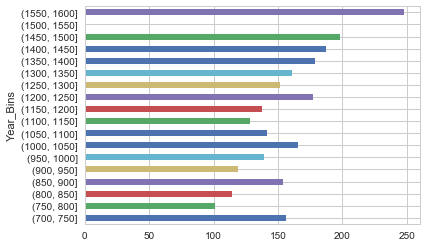

In [121]:
bins = list(range(700, 1601, 50))
manuscripts['Year_Bins'] = pd.cut(df['Year'], bins)
ax = manuscripts.groupby(['Year_Bins'])['Pages'].mean().plot.barh()

## 5. (light) Regression  <a id='5'></a>